# For Loops, Vectorization, and Plotting

One of the places that computers shine most is in automating repetitive tasks. When faced with calculations over large sets, we frequently handle them using loops. To truly appreciate the benefit of a loop, you have to think big -- if you need to do one or ten iterations to get an answer, then it might be reasonable to solve your problem by hand, using a calculator, or using a spreadsheet. But when you have to perform an operation hundreds or thousands of times, then you'll want to use a programming language, and you will probably consider looping those calculations to automate iterations so that you don't have to write them out line by line.

We will use two types of loops: **for loops** and **while loops**. At a high level, they are similar in that they will repeat an operation in a cyclic fashion until they meet some criteria that we have specified, at which point, they terminate and exit, returning any outputs that we generated over the coures of the loop.

The fundamental difference between the two types of loops is this: **For loops** will cyclicly perform an operation on every element in a pre-defined set. **While loops** will cyclically perform an operation until threshold criteria are met.

As usual, the best way to get a feel for this is with some examples.  

```{note}
For loops and while loops are just general tools that you can use in solving problems and processing data. Both are almost infinitely flexible in how they are used. It is important to remember this in going through examples in Module 04 and Module 06, which illustrate some ways that one can use for loops and while loops. More importantly, these examples will get you familiar with loop architechure, syntax, logic, and execution. Do not get stuck in thinking "This is always how I should use a for loop" or "I can only use a while loop in this situation." You can abstract both types of loops to solve many different problems. Doing so only requires that you think about how to adapt the basic architecture of the loop to solve the problem at hand.
```

In [1]:
import numpy as np


## For Loops

Let's start with a basic for loop.  The key thing about a for loop is that it will perform the specified operation for each  element in a collection, in the order that the elements appear in the collection. The "collection" in a for loop is called the iterable: it is what the loop "iterates" over. Common things that we iterate over in a for loop are lists, ranges, and numpy arrays, but you can iterate over pretty much any type of collection. 

For example, let's say I have a list of the integers between 1 and 11. Let's create and print that list out so we can see the output. Notice how it returns the full list on a single line, wrapped in brackets and separated by commas and looking just like a list? 

In [2]:
A = [1,2,3,4,5,6,7,8,9,10,11]
print(A)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


### Introduction using a basic for loop

Now lets print out the elements of this list using a for loop. To do that, I will ask my for loop to print the current value of A on each pass through the for loop: 

In [3]:
for value in A:
    print(value)

1
2
3
4
5
6
7
8
9
10
11


Above, "value" refers to the current element in A on a given pass through the loop. On the first pass, value = 1, and this loop should print 1 to the screen.  Once it has done that, it has completed its first pass through the loop and it moves on to the next "value" in A.  Since there is a second element in A, the loop will return to the start and update "value" to 2.  On the second pass, value = 2, and we see this print to the screen.  This will continue until the operation(s) specified in the body of the for loop have been carried out for every element in the iterable, i.e., it continues until it reaches 11.  

Compare the result you get from the for loop to the result you get with `print(A)`. As you do this, try to reason through the difference between a print statement executed on each pass through a for loop and one executed on the full list. In the for loop, each time you see a single, integer value from within A print to the screen is a single pass through the for loop.  If you get this, you have a good enough grasp of for loops to work with them!

In [4]:
for value in A:
    print(value)
print(A)

1
2
3
4
5
6
7
8
9
10
11
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


### For loop syntax

Here are a few important notes about **for loop** syntax:  The choices above of the word "value" and the letter "A" to represent the list are arbitrary.  You can use almost any strings you like here.  Otherwise, the first line in a for loop always looks like we have written it above. It starts flush left with the **for** keyword.  Then it always takes the form: 

```python
for variable in iterable:
    #operations in the scope of the for loop
#for loop ends when you return flush left
```

The first line in a for loop is terminated by a colon; the colon is non-negotiable. Finally, every line inside the body of a for loop is indented relative to the for keyword. This is how you designate that a bit of code is inside the scope of the for loop or outside the scope of the loop. Once you are done defining the scope of the for loop, you return to writing code flush left, which signals to the interpreter that you are no longer inside of the for loop.

```{note}
The basic syntatic structure of a for loop is shared by many other constructs in Python. If statements, while loops, and functions also use the same colon-indent structure to specify their scopes.
```

### Adding complexity to the loop

There are an infinite number of ways to use a for loop. In very general terms, the two things that I do most commonly with for loops in Python are: 

1. Perform an operation directly on each element in the iterable
2. Use the iterable as an index to reference elements in data sets for operations in a for loop.

Our simple print example was the first kind - we had a list of integers in A, and we printed out each integer in A by cycling its values into a print() function on each pass through a for loop. For other examples of this type of behavior, one could try: 

In [5]:
for value in A:
    print(value**2) #Print the square of each element in the list A

1
4
9
16
25
36
49
64
81
100
121


In [6]:
for value in A:
    print(value - 74) #Print the value of each element in the list A minus 74

-73
-72
-71
-70
-69
-68
-67
-66
-65
-64
-63


In [7]:
for value in A:
    print(value%2) #Print the remainder of each element in A divided by 2

1
0
1
0
1
0
1
0
1
0
1


### Using the iterator as an index in your for loop

Looking at the printout, you will see that each of these performs an operation **directly** on each element in the iterable (A). Operating on an iterable is frequently useful, and we'll continue to demonstrate applications below, but I want to briefly point out the difference in logic between this and using the iterable as an index.

Let's imagine we have a set of 8 measurements that we made experimentally, we'll call them **meas**.  Just to ground this, let's say these are 8 mass transfer coefficients that we measured at 8 different liquid velocities. They have units of cm/sec.  Let's store these in a list.

In [8]:
meas = [10.75, 12.52, 17.90, 18.4, 22.36, 35.10, 56.2, 74.95] #cm/sec

As we often do in engineering, we are developing a model that is supposed to predict the value of each of those mass transfer coefficients at a given fluid velocity. Without getting into the specifics of that model, let's just say that our model predicts that those 8 mass transfer coefficients at those same 8 fluid velocities have the following values, which we store in a separate list called **pred**.

In [9]:
pred = [9.4, 13.62, 15.89, 19.23, 21.75, 36.24, 59.46, 73.13] #cm/sec

To figure out how well our model agrees with our measurements, we generally calculate the residual error, i.e., the difference between the model's prediction and the measurement's value. I see that I have two lists, both of which are 8 elements long. I want to subtract the values in these lists element by element...but I can't do that directly with lists. Lists are not the same thing as numpy arrays, and they do not natively support elementwise operations like a numpy array would. 

```{caution}
Math operators applied directly to a list or string will concatenate their values, not add, subract or multiply their values.
```

When I am working with lists in Python, the way I would compute the difference between model and measurement using lists is with a for loop. Unlike the first example, though, I don't want to use either **ex** or **mod** as the iterable because I want to perform operations that use **both** of their values, i.e., I want to find the difference between each value in the two lists. One way to handle this is to use the iterable as an index to extract elements of the data sets that you are working with.  This is relatively straightforward - we just create an iterable that starts at 0 (the first index in Python), increases by 1 at every pass through the loop, and includes the same number of elements as my list, which is 8 in this case. We can do this using the `range()` function, which creates an interable from a starting integer to an ending integer.  The endpoint is excluded, and it takes steps of 1 integer unit by default. A convenient way to do this without counting large lists is to use the `len()` function to define the upper limit of your range.  For example:

In [10]:
for k in range(0, len(meas)):
    residual = meas[k] - pred[k]
    print(residual)

1.3499999999999996
-1.0999999999999996
2.009999999999998
-0.8300000000000018
0.6099999999999994
-1.1400000000000006
-3.259999999999998
1.8200000000000074


This for loop simply prints the difference betwee model and experiment for each condition tested, but this general concept is easily abstracted and applied to much more complex problems - we'll see an example later.

Take a moment to think about why that range specification works.  Each list is 8 elements long, so my range function is range(0,8); range excludes the ending value, so it will iterate from 0 to 7, which are the correct 8 indices for an 8 element list in Python.

### The `range()` function in more detail

Above, we used `range()` to define the iterable without really saying much about how it works. The syntax of range is:

```python
range(start, end, step)
```

"start" and "end" are function arguments (inputs). They tell you where range starts and where it stops. Of these two, only "end" is mandatory.  If you do not include "start", range will start at 0 by default. "step" is an optional argument that tells you the size of the step you want to make between elements in the range. Inputs to the range function **must be integers**. The range will include the starting integer, but it will not include the ending integer. By default, the step size is 1, but you may change it to any positive or negative integer you like. 

Range does not create a list directly, it defines the space over which we want to carry out an iteration. In fact, if you print a range, you will see that it really just echos your definition back to you. Try, for example:

In [11]:
range(0, 10, 2)

range(0, 10, 2)

A range is definitely not a list! But if needed, you can use it to create a list (or an np array) by passing it to the list constructor:

In [12]:
list(range(0,10,2))

[0, 2, 4, 6, 8]

Or, to the analogous numpy array constructor:

In [13]:
np.array(range(0,10,2))

array([0, 2, 4, 6, 8])

### Using the range function as the iterable

One common usage of the range function is to generate the iterable in for loops as we did in the above example of calculating residual error. There is a lot of flexibility in how you do this.  As an example, let's say I want to create a list that contains all of the integers from positive 10 to -10 in descending order. 

I can easily do this using the `range()` function in a for loop. To reinforce on prior content, we will also take advantage of the append module in Python, which adds a value to the end of a list. 

We will start by creating an empty list B. Then we use a for loop to append the integers from 10 to -10 to the end of that list.  Note that this is not best practice nor the most memory efficient way to create this list, but it is illustrative for educational purposes.

In [14]:
B = []
for i in range(10,-11,-1):
    print(B)
    B.append(i)
print(B)

[]
[10]
[10, 9]
[10, 9, 8]
[10, 9, 8, 7]
[10, 9, 8, 7, 6]
[10, 9, 8, 7, 6, 5]
[10, 9, 8, 7, 6, 5, 4]
[10, 9, 8, 7, 6, 5, 4, 3]
[10, 9, 8, 7, 6, 5, 4, 3, 2]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7, -8]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7, -8, -9]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10]


Creating an empty list, `B = []` may seem strange, but it is an important step. I am trying to create a list of integers, and `.append()` only works on a list. So I need to start with an empty list so that I have something to append to on the first pass through the loop.  Notice the difference between what we do here (create a list of integers from 10 to -10) and in the early example where we just print out the elements of a list.  We are actually modifying the list B using the append module on each pass through the function!  Notice that the first `print()` is within the scope of the for loop, and the second `print()` is flush with the for keyword at the left margin - this means that the first `print()` will be executed on each pass through the loop as the list grows, while the second `print()` will not be executed until after the loop is completed.

### Using a loop to calculate the residual sum of squares from lists

Let's go back to our example of trying to compare measured data (**meas**) with model data (**pred**). This is the basis for regression analysis, where we try to find the model and model parameters that best describe our data. When we perform a regression analysis (trendline in Excel, for example), we often do so by calculating the sum of squares of residual errors.  I can easily do this by modifying my for loop above to store the square of the residual values; then, we can use the built in `sum()` function to sum them. Again, this is probably not the most efficient way to calculate the sum of squares; it is intended as an illustrative example.

```{caution}
**Remember**: In base Python, the `^` operator you might typically associate with power operations is a bitwise XOR, not an exponent. Instead, you use `**` to indicate raising something to a power.
```

In [15]:
SE = []                           #initialize by creating an empty list
for k in range(0, len(meas)):
    residual = meas[k] - pred[k]  #calculate residual error
    SE.append(residual**2)        #append square of residual to SE list
SSE = sum(SE)                     #calculate sum of squares   
print(SE, '\n')                   #display square errors
print(SSE)                        #display sum of squares

[1.8224999999999991, 1.2099999999999993, 4.040099999999992, 0.6889000000000031, 0.3720999999999993, 1.2996000000000012, 10.627599999999987, 3.312400000000027] 

23.373200000000004


### Vectorized operations with numpy arrays can sometimes replace for loops

As we defined them above, **meas** and **pred** are both lists, so we cannot do math element-by-element on them without writing some type of loop. But remember: 

```{note}
numpy arrays *will* support elementwise operations by default
```

 So, for example, if I turned these two lists into numpy arrays:

In [16]:
measarray  = np.array(meas)
predarray  = np.array(pred)

Then I could calculate residual error and then sum of squares directly *without* using a loop; this is probably closer to best practice if you are able to work with numpy arrays as your data format.  

In [17]:
residualarray = measarray - predarray
SE  = residualarray**2
SSE = np.sum(SE) #numpy's implementation of sum()
print(SSE)

23.373200000000004


Once you get the hang of element-wise operations, you can write pretty concise code; for example, the line belwo is equivalent to the three above. You can see how this can make for (potentially) more efficient and readable code compared to for loops.

In [18]:
SSE = np.sum((measarray - predarray)**2)
print(SSE)

23.373200000000004


Considering the contrast between a for loop and a vectorized operation should help you to get a better feel for the differences between lists and arrays and the ways that elementwise operations can be useful in programming, particularly for math problems.

### List Comprehensions

Another tool that is worth demonstrating is a list comprehension. Let's say you want to create a large list of numbers that meet some criteria. For example, I need a list of the squares of all of the numbers between 1 and 50.  That's hard to do manually. It is even cumbersome in something like Excel.  In a programming languague, we might use a **for loop** to do this. Let's say we are working with lists in Python; our intuition might be to write a for loop that looks like this, wherein we iterate through a range and append values to an ever-growing list. 

In [19]:
squares = []
for x in range(1, 51):
    squares.append(x**2)
print(squares, '\n')
print(squares[-1]**(1/2))

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500] 

50.0


The usage of range here includes the first element (1) but it does not include the last element, so we go to 51. By default, range increments by 1, so this for loop will compute:

```python
1**2
2**2
3**2
4**2
```
    
And so forth all the way up to

```python
50**2
```

In the final lines, we print both the list and the square root of the last element using the command below to see if it behaved as we expect. Again note the use of a -1 index in Python will return the last element in an ordered collection.

The above loop is intuitive but somewhat cumbersome. In general, we like to avoid having a collection change size on every pass through a loop. A list comprehension provides a shorthand syntax that automates a **for loop** to generate a list from a desired operation in a single, simple line of code. For our example above, I could create the same list using the following syntax. It works in a slightly different way than the above for loop, but it accomplishes exactly the same outcome with a more concise syntax and without needing to change the list size on every pass through a loop with append. This is the most "Python" way to create the requested set of squares.  It is called a list comprehension, and you see them all the time in Python.

In [20]:
squares = [x**2 for x in range(1, 51)]
print(squares, '\n')
print(squares[-1]**(1/2))

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500] 

50.0


### Practice with List Comprehensions

List comprehensions are extremely useful; they can quickly generate large lists by automating any simple operation on a range. This can afford flexibility that you don't have with things like `np.linspace()`, `np.logspace()`, `np.arange()`, etc.  So they are a useful tool that you should be aware of!

```{note}
If you ever need to work seriously with Python, and you interact with others that write code in Python, it is almost inevitable that you will come across list comprehensions, so you should know your way around them.  **Remember**: it is easy to convert a list into a numpy array if you need to; all you do is pass the list as an argument to the `np.array()` function. 
```

The cell below shows a few different list comprehensions to generate relatively complicated lists. In the last example, notice how we are using an existing list to create the iterable that the list comprehension iterates over.  This is totally acceptable - it is a nice way to perform a simple operation on the values in one list to convert it into something else entirely.

In [21]:
K = [n for n in range(0,31)]
L = [x for x in range(0,31,2)]
M = [p**3 for p in range(0,31,5)]
N = [2, 14, 64, 212, 123.6, 4.57 + 3j]
O = [j**2 for j in N]
print(K, '\n')
print(L, '\n')
print(M, '\n')
print(N, '\n')
print(O, '\n')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] 

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30] 

[0, 125, 1000, 3375, 8000, 15625, 27000] 

[2, 14, 64, 212, 123.6, (4.57+3j)] 

[4, 196, 4096, 44944, 15276.96, (11.884900000000002+27.42j)] 



### Know that there are alternatives with numpy arrays

```{caution}
List comprehensions generate lists, not numpy arrays. 
```

If you wanted to convert a list to a numpy array, you certainly can:

In [22]:
squaresarray = np.array(squares)

However, if I knew that I wanted to work with numpy arrays in the end, I'd probably just create my set of sqaures as an array using elementwise operations on the array, which is arguably slicker and more efficient:

In [23]:
squaresarray = np.linspace(1, 50, 50, dtype = 'int')**2
print(squaresarray, '\n')
print(squares[-1]**(1/2))

[   1    4    9   16   25   36   49   64   81  100  121  144  169  196
  225  256  289  324  361  400  441  484  529  576  625  676  729  784
  841  900  961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681 1764
 1849 1936 2025 2116 2209 2304 2401 2500] 

50.0


It can be confusing to consider lists and numpy arrays side by side, especially for students...but I find that it is worse to not know the differences between the two because sometimes, in Python, you'll find yourself needing to work with a list, so it is best to understand that it is not a numpy array and that it behaves differently from a numpy array. 

### Flexibility is powerful, but it can be frustrating

It is important to embrace the following about programming: There is not really one "correct" way to perform a complex operation.  Like the examples above of creating create a list of integers from 10 to -10 or square a bunch of numbers from 1 to 50. We did them with for loops, elementwise operations in numpy arrays, and list comprehensions above, but there are many possibilities.  Some are more elegant, more concise, cleaner, more human-readable, logical, faster, etc. There are usually at least half a dozen ways to do any one thing in programming, and that is OK.  Perhaps not only OK, it is one of the best things about programming. It affords you the flexibility to solve a given problem in a manner that suits that problem.  You do this with the toolkit that you have available at the moment, and that toolkit will continue to grow as you get more practice. You will get used to this, you will learn different ways to do things as you mature, you will become a better programmer, you will use the best approach available to you at the time, and then you will learn from more experienced programmers how to continue improving your codes.

```{note}
You may be wondering "when should I use a for loop...when should I try to write that same idea as a list comprehension...and when should I use elementwise operations?"
```

It's a great question, there is not really a universally correct answer.  That ambiguity can be frustrating, but it is that very same flexibility that makes Python so powerful. Embrace it, learn a bit about the strengths and weaknesses of each method, and use whichever is appropriate for your problem. 

Personally, I would use whichever is more convenient, easier to script without turning my brain into a pretzel, and (if it matters and there is an appreciable difference) runs faster. My rule of thumb is that if the operations in a for loop are simple and I can visualize the structure of the list comprehension without much thought--say I want to square all of the elements in a list or add 12 to all of the elements in the list--it is probably going to be much cleaner, easier, and faster to use a list comprehension. If the operations in the for loop are lengthy and complex--let's say I need to solve a system of 12 nonlinear equations on each pass through the loop--it is probably best to expand the for loop line by line. It gets difficult to imagine how to pack so many complex operations into a single line of code. Even if you manage to do so just to convince yourself that you can, spare a thought for the other programmers that are going to eventually work with your code and need to interpret the logic in your one liner. Finally, if you are working with a numpy array, for any simple operations, it is almost always going to be cleaner to just use elementwise operations instead of loops or comprehensions.

### You can iterate over lots of things...

Now, let's try to abstract the idea of a for loop a bit more by covering different types of iterables. We'll do a little exploration by writing a generic bit of code that we can modify to test out different types of iterables. Confirm that this print loop works on the list testcase, then re-define test as the various types of iterables given below by uncommenting them. This is to give you feedback on what works as an iterable and what doesn't work as an iterable.

In [24]:
test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]           #this is a list
test = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)           #this is a tuple
# test = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]) #this is a numpy array
# test = range(1, 12)                                  #this is a range
# test = 'These go to eleven'                          #this is a string

iterable = test
for var in iterable:
    print(var)

1
2
3
4
5
6
7
8
9
10
11


The last example is interesting to me. Before I started using Python, it never occured to me to iterate over a string, but we can certainly do it!  Remember, a string is an ordered set of characters, where each character has a specific index.  So it is a perfectly suitable iterable, and one that we may find very useful depending on the type(s) of problems we are solving or data we are processing.

Now for some things that we can't iterate over:  Put simply, any scalar other than a string is not a valid iterable. To get a feel for the type of error message this generates (which gives you a feel for how to fix said error messages when you see them)  Try it out for:

In [25]:
test = 7         #An integer
# test = 7.0       #A floating point decimal
# test = True      #A boolean
# test = 4.75 + 3j #A complex number

iterable = test
for var in iterable:
    print(var)

TypeError: 'int' object is not iterable

### A more complex example

Circling back to that comment about loops really shining when you need to repeat an operation over a large set. Here's an example that is relevant to chemistry and engineering. This example requires a bit of background in thermodynamics, but it should be at least somewhat familiar if you've taken general chemistry, finished material and energy balances, or heard of "Hess's Law". Even if none of those things are familar, fear not -- for this module, which is focused on Python skill building, the details and "why" of the calculations are less important than the fact that we will do a lot of them and automate the process using a for loop.

#### Context

Let's say I am in the proces engineer in charge of a Fluidized Catalytic Cracker (FCC). An FCC unit is something everyone should at least know about - it is type of reactor used extensively in an oil refinery. Crude oil contains a lot of heavy, high molecular weight species that are not much use as fuels or chemical feedstocks. An FCC unit "cracks" these high molecular weight hydrocarbons to make gasoline and light alkenes (ethylene, propylene, butene, butadiene), which are far more valuable. There are hundreds, if not thousands of chemical reactions happening inside of a catalytic cracker. For the purpose of this example, let's say there are...100 different reactions.

Each of these 100 reactions has a unique enthalpy change ($\Delta H$), a unique entropy change ($\Delta S$), and a unique Gibbs free energy change ($\Delta G$) associated with it. The enthalpy change, entropy change, and temperature determine the Gibbs free energy change according to the very simple equation below:

$$\Delta G = \Delta H - T \Delta S$$

We then use the Gibbs free energy change to calculate the equilibrium constant (K) for each reaction using another very simple equation. 

$$K = \exp{\left(-\Delta G/RT\right)}$$

Where exp is the standard exponential function and R is the gas constant in appropriate units. The equilibrium constant is important because it allows us to determine the composition of our reacting mixture at chemical equilibrium. That seems like something that would be really important for any chemical process, so why not catalytic cracking? To do that for an FCC unit, we would need to calculate all 100 equilibrium constants - there is one unique K for each reaction. 

That sounds like a ton of tedious work to me. But it turns out that if we know a bit of Python, it is really easy. The worst part, by far, is finding the thermodynamic data for these reactions. We are going to take the lazy approach for finding thermodynamic data, which is to make it up completely for the purpose of solving this example. To this end, I will use a random integer generator to create a list of 100 *reasonable* enthalpy changes of reaction and 100 *reasonable* entropy changes of reaction. 

```{warning}
Doing this will never fly in your thermo or mass and energy courses, please understand that we are randomly generating thermochemistry data here just doing this to demonstrate how to use a for loop to process a large data set.
```

### An Example of this in base Python using lists

In [68]:
import random
random.seed(1) #This sets the seed for the random number generator so that we always get the same "random" set of enthalpies and entropies
DS = [random.randint(-75,75) for s in range(0,100,1)] #units all in J/mol/K
DH = [random.randint(-100000,100000) for h in range(0,100,1)] #units all in J/mol

```{caution}
These are lists, not numpy arrays, so I have to use loops to perform element-by-element operations on them.
```

Now that the very difficult work of finding enthalpies and entropies of reaction is done, we can automate application of those two simple formulas above to calculate the equilibrium constant for each reaction:

\begin{align}
    \Delta G &= \Delta H - T \Delta S \\
    K &= \exp{\left(-\Delta G/RT\right)}
\end{align}

For now, we'll do this at a temperature of 500K. Working in units of Joules, moles, and K, the gas constant has a value of 8.314 J/mol/K. In engineering, you'll never regret keeping careful track of units!

Referencing again my two general ways that I might use an iterable, in this case, I want to use individual elements of both $\Delta S$ and $\Delta H$ to calculate equilibrium constants, so I will treat my iterable as an index, and I will use that index to extract relevant elements from $\Delta S$ and $\Delta H$ on each pass through the loop.

I have 100 elements in $\Delta S$ and 100 in $\Delta H$, and I want to perform the calculations for each of those elements to calculate 100 different equilibrium constants, so I want an iterable that contains the integers from 0 to 99 (remember, for a 100 element list, indices in Python go from 0 to 99). Then I can use those numbers as indices to perform operations on each element. **Note:** To use the exponential function, I have to import it from `math` or `numpy`.

We initialize the calculation with an empty list for K, and then we use the append module to add each calculated equilibrium constant to the set. Also notice how we use the current value of i as an index that goes from 0 to 99 to allow us to use specific elements from $\Delta H$ and $\Delta S$ in each pass through the loop. Give it a try below! The last line in the code will return K to the screen so you can get a feel for the size of the data sets you're starting to work with.

In [71]:
T = 500 #K
R = 8.314 #J/mol/K
K = []
for i in range(0,100):
    DG   = DH[i] - T*DS[i]
    temp = np.exp(-DG/R/T)
    K.append(temp)
# K

Next we'll look at a few alternative ways to accomplish exactly the same result using different strategies. None are "right" or "wrong" and they are all worth knowing as the one that you use will depend on the specifics of the problem you're solving.

### Alternative syntax using `zip()`

A more "python" version of that loop would probably be to use the `zip()` function to iterate over both $\Delta H$ and $\Delta S$ simultaneously; this will give an equivalent result to the loop above.

In [73]:
T = 500 #K
R = 8.314 #J/mol/K
K = []
for dh, ds in zip(DH, DS):
    dg   = dh - T*ds
    temp = np.exp(-dg/R/T)
    K.append(temp)
# K

In any case, those loops are pretty sweet! They are just a few lines of code, they take less than a second to run, and they give us all 100 equilibrium constants! By far, the most difficult part of this in the real world would be the part that we skipped -- finding accurate thermodynamic data ($\Delta H$ and $\Delta S$) for 100 different reactions!

### An equivalent version with comprehensions

The above loop can also be translated to list comprehensions as shown below; note again the use of `zip()`, which allows us to loop over multiple iterables simultaneously.

In [74]:
DG = [dh - T*ds for dh, ds in zip (DH, DS)]
K  = [np.exp(-dg/R/T) for dg in DG]

### The elementwise version with numpy arrays

As we pointed out earlier, we can often replace a loop with vectorized, element-wise operations.  For example, if we just convert $\Delta H$ and $\Delta S$ into numpy arrays (or otherwise use numpy's random number generators to generate a list of DH and DS values). Then, we can very easily calculate $\Delta G$ and $K$ for all 100 reactions:

In [75]:
DHarray = np.array(DH)
DSarray = np.array(DS)
DGarray = DHarray - T*DSarray
Karray  = np.exp(-DGarray/R/T)   

### Increasing the dimensionality

But maybe that doesn't quite impress you. I get it. You're a die hard Excel fan and you know that, realistically, if you just made up 100 enthalpies and entropies of reaction too, it would be easy enough to calculate 100 equilibrium constants at 500K by autofilling the cells. Fair point. That's probably true ***for a single temperature.***  But what if you wanted to know how each of those equilibrium constants changed as smooth functions of temperature between, say, 300K and 900K? That's a pretty big span...Let's calculate those equilibrium constants at 300K, 302K, 304K, etc. all the way up to 900K to generate sets of equilibrium constants as a function of Temperature for each of our 100 reactions.

Although it isn't impossible, it gets unwieldy in a spreadsheet, but as we see below, I only have to modify my script slightly to do this in Python.

The cells below go through doing this in base Python using lists; there are other approaches that you can develop using numpy arrays, but, in general, doing this element-wise becomes tricky and hard for a human reader to parse, so I prefer the solution that uses for loops.

First, I will create a list of the start and end temperatures I'm interested in. I want to take steps of 2K and go from 300 to 900K. You could use either a list constructor or a comprehension here; I'll use the constructor. 

In [77]:
Temperature = list(range(300, 901, 2))

### Calculate 100 K values at 301 temperatures...

Now, we have to do a bit of abstraction and see if we can generalize our last for loop to run not just on one temperature, but on all 301 temperatures. As usual, you can come up with many ways to do this, but in base Python and working with lists as my data structure, I will do this with pair of for loops, one nested inside of the other. Notice that when I create nested for loops, each **for** keyword is indented from the current level (i.e., spacing from the left margin).

**The logic**:  I want to run my original for loop for every Temperature in the list of temperatures we just created. So, I will create two for loops.  The first one will specify the current reaction, and the second will specify the current temperature. Ultimately I will store a list of lists, the latter of which will be equilibrium constants for reaction i at all 301 temperatures.

```{warning}
In the example below, I have assumed that $\Delta C_p = 0$ such that $\Delta H$ and $\Delta S$ are constant even though temperature is changing.  This is not generally true, it is a simplification that I have applied to make the problem a bit more straightforward. In a real thermodynamic analysis, you would generally need to include heat capacity effects in these calculations.
```

In [79]:
K = []       
for i in range(0,100):        
    Krxn = []                 
    for T in Temperature:     
        DG = DH[i] - T*DS[i]  
        temp = np.exp(-DG/R/T)   
        Krxn.append(temp)     
    K.append(Krxn)            

Alternatively, you can use the arguably more Pythonic sytnax given below to accomplish the same thing:

In [80]:
K = []                        
for dh, ds in zip(DH, DS):    
    Krxn = []                 
    for T in Temperature:     
        DG = dh - T*ds  
        temp = np.exp(-DG/R/T)   
        Krxn.append(temp)     
    K.append(Krxn) 

No matter how you write the loops, the end result is going to be equilibrium constants for 100 different reactions calculated at 301 different temperatures, i.e., a 100x301 set of equilibrium constants. It is a list of lists - there are 100 lists inside of this list.  Each of these interior lists is 301 elements long. Each list (inside of the master list K) represents the 301 equilibrium constants for that reaction at all 301 reaction temperatures.  For example, `K[0][:]` is the complete set of equilibrium constansts for the first reaction at all 301 temperatures, `K[1][:]` is the analogous set for reaction 2, etc. 

I do not suggest printing K.  At this point, the best way to visualize the data is graphically; we will introduce this briefly below. To add in graphical capabilities, we need to add a plotting package.  We'll use Pyplot, which we import in the next cell.

### Importing pyplot

Let's import pyplot from matplotlib.

In [81]:
import matplotlib.pyplot as plt

### Basic graphing syntax in pyplot


Pyplot syntax is very similar to Matlab. In general any type of plot you want to create is specified by:

```python
plt.plot(independent_variable,dependent_variable)
```
    
Let's say we want to plot the equilibrium constant for the first reaction as a function of temperature.  Our equilibrium constants are stored in a list of lists.  The list is 100 elements long, and each element is a 301 element list that contains the equilibrium constants we calculated at each temperature.  So:

```python
K[0] #equivalent to K[0][:]
```

Will extract the equilibrium constant for the first reaction at all 301 temperatures;

```python
K[10] #equivalent to K[10][:]
```

Will extract the equilibrium constant for the 11th reaction at all 301 temperatures, etc.

So, if I wanted to plot the equilibrium constant for the first reaction as a function of temperature using pyplot, I could write the lines of code below; the first line `plt.plot()` constructs the plot. It uses linear axis scaling by default. The second line `plt.show()` forces display of the current figure.

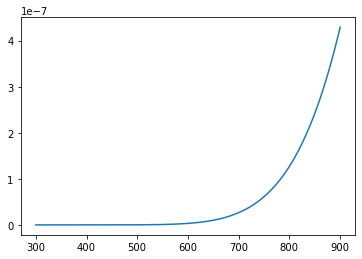

In [86]:
plt.plot(Temperature,K[0][:])
plt.show()

### A semilog plot

Now that is not a very informative graph.  The thing about equilibrium constants is that they are such a strong function of temperature that they change over orders of magnitude.  For example, if we print:

In [83]:
print(K[0][1])
print(K[0][-1])

1.8392016768229527e-15
4.2896854883352646e-07


Which gives us the equilibrium constant for the first reaction at 300K and at 900K, respectively, we will see that they can be different by orders of magnitude (the exact amount depends on the randomly generated $\Delta H$ and $\Delta S$ for each reaction).  This sounds like a job for a semilog plot, which we can build using a slightly different syntax in pyplot.

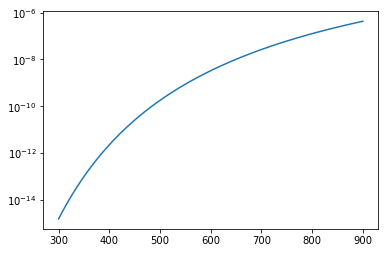

In [87]:
plt.semilogy(Temperature, K[0][:])
plt.show()

### Stacking plots

By default, Python will continue updating your current plot as you layer additional plot commands on top of the first one.  So if I were to run the code in the cell below, it would plot equilibrium constants for the first and second reaction as a function of temperature on the same axis (graph). It is treated equivalently to typing:

```python
plt.semilogy(Temperature, K[0], Temperature, K[1])
```

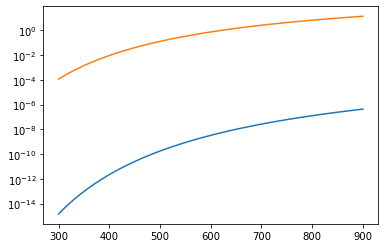

In [89]:
plt.semilogy(Temperature, K[0])
plt.semilogy(Temperature, K[1])
plt.show()

### Stacking a lot of plots...

Well, of course now that we went and generated a 100 x 301 data set, I would really like to plot **all** 100 equilibrium constants as a function of temperature, but I really do not want to write a plot command for every element in that list of lists, e.g.,

    plt.plot(Temperature, K[0][:], Temperature, K[1][:], Temperature, K[2][:]...)
    
If I have a good understanding about how my loops and indices are working, I can do this easily in my for loop by taking advantage of Python's layering sequential plots onto each other.  Let's modify that last loop just a bit to include a plot command:

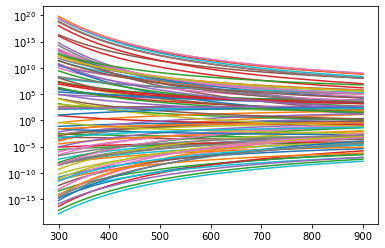

In [90]:
K = []                        
for i in range(0,100):       
    Krxn = []                 
    for T in Temperature:     
        DG = DH[i] - T*DS[i]  
        temp = np.exp(-DG/R/T)  
        Krxn.append(temp)    
    K.append(Krxn)             
    plt.semilogy(Temperature,K[i][:])  #This adds the 301 equilibrium constants for the current reaction to the plot.

These are a very cursory introduction to plotting using Pyplot; as we cover examples in the next few modules, we will add complexity to our plotting commands and learn how to construct better, more informative graphs.